In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize

### We will proceed with working with a chunk of the data since the size of the dataset is too huge

In [2]:
file = pd.read_csv('C:/Users/Arunima/OneDrive/Documents/ESCP/Python/Final/train.csv')
extract1 = file.sample(frac=0.005, replace=True, random_state=23)
extract1.to_excel('ML_extract.xlsx')
df = pd.read_excel('C:/Users/Arunima/OneDrive/Documents/GitHub/ML_extract.xlsx')

In [3]:
df.head()

,Unnamed: 0,ID,keywords,age,sex
0,7184979,6125148,detail_offre:1;emploi:1,28,F
1,4846310,6922079,vaisselle:4;erreur+024+siemens:1;panne:3;e24:2...,52,M
2,7087144,1491107,football:1;les:1;fiasco:1;luxembourg:1;raisons...,38,M
3,5990345,126032,programme:1;agression:1;tout:1;civile:1;envers...,40,M
4,1844712,171181,zodiaque:1;jour:1;horoscope:1;psychologie:1;sc...,42,F


In [4]:
df.isnull().sum()

Unnamed: 0       0
ID               0
keywords      4310
age              0
sex              0
dtype: int64

In [5]:
df.dropna(subset=['keywords'], inplace=True)
df['ID'].dtypes

dtype('int64')

In [6]:
df['keywords'].dtypes

dtype('O')

### Data preprocessing 
##### We aim to modify the ''Keywords' column. 
We will do this by splitting the words and their occurences.
Next, we will insert the words and occurences into 2 lists.
We will remove all the stopwords from the lists

In [7]:
from nltk.corpus import stopwords
s = stopwords.words('french')

In [8]:
import string
nopunc = [char for char in df if char not in string.punctuation]

In [9]:
def processing(x):
    list_sub =[]
    for item in x:
        item = x.split(';') 

    for i in range (0,len(item)):
        list_sub = list_sub + item[i].split(':')
        
    for i in range (1,len(list_sub)):
        if i%2 !=0:
            list_sub[i] = int(list_sub[i])
            
    integer = [x for x in list_sub if isinstance(x, int)]
    string = [x for x in list_sub if isinstance(x, str)]
    
    word_list = sum([[sm] * n for sm, n in zip(string, integer)], [])
    word_filtered_list = [x for x in word_list if not any(s.isdigit() for s in x)]
    
    Output = [y for y in word_filtered_list if word_list not in s]

    return Output

In [10]:
df['words'] = df["keywords"].apply(processing)

In [11]:
df.head()

,Unnamed: 0,ID,keywords,age,sex,words
0,7184979,6125148,detail_offre:1;emploi:1,28,F,"[detail_offre, emploi]"
1,4846310,6922079,vaisselle:4;erreur+024+siemens:1;panne:3;e24:2...,52,M,"[vaisselle, vaisselle, vaisselle, vaisselle, p..."
2,7087144,1491107,football:1;les:1;fiasco:1;luxembourg:1;raisons...,38,M,"[football, les, fiasco, luxembourg, raisons, a..."
3,5990345,126032,programme:1;agression:1;tout:1;civile:1;envers...,40,M,"[programme, agression, tout, civile, envers, r..."
4,1844712,171181,zodiaque:1;jour:1;horoscope:1;psychologie:1;sc...,42,F,"[zodiaque, jour, horoscope, psychologie, scorp..."


### Data Preparation

#### The following functions will help with the basic data preparation. We will use these functions later.

### Calculating occurence and words, and number of unique words

In [12]:
def preparation(x):
        
    from collections import Counter
    length = []
    for i in x['words']:
        a = len(i)+1
        length.append(a)
    x['Length'] = length
    
    Occurence = []
    Word = []
    for i in x['words']:
        b = Counter(i).values()
        c = Counter(i).keys()
        Occurence.append(b)
        Word.append(c)
    x["Occurence"] = Occurence
    x["Word"] = Word
    
    Number_Unique = []
    for i in x.Word:
        e = len(Counter(i).keys())
        Number_Unique.append(e)
    x["Unique_Value"] = Number_Unique   
    
 
    Max = []
    for i in x.Occurence:
        i = max(i,default=0)
        Max.append(i)
    x['Max_Frequence'] = Max

### Extracting the top words and typology

In [13]:
def wording_preparation(x):    
    
    from collections import Counter

    Top = []
    for i in x['words']:
        i = Most_Common(i)
        Top.append(i)   
    
    x['Top_Word'] = Top
    
    Typology = []
    for i in x['Top_Word']:
        i = nltk.word_tokenize(i)
        e = nltk.pos_tag(i)
        Typology.append(e)

    x['Typology'] = Typology

    x['Typology'] = x['Typology'].astype(str)

    Typology_2 = []
    for i in x['Typology']:
        i = i.split(',', 1)[1]
        i = i[:-2]
        Typology_2.append(i)
        
    x['Typology'] = Typology_2

### Extracting Word Length

In [14]:
from collections import Counter
length = []
for i in df['words']:
    a = len(i)+1
    length.append(a)

df['Length'] = length

### Extracting Words and Occurences

In [15]:
Occurence = []
Word = []
for i in df['words']:
    b = Counter(i).values()
    c = Counter(i).keys()
    Occurence.append(b)
    Word.append(c)
    

df["Occurence"] = Occurence
df["Word"] = Word

### Extracting the Unique Values

In [16]:
Number_Unique = []
for i in df.Word:
    e = len(Counter(i).keys())
    Number_Unique.append(e) 
    
df["Unique_Value"] = Number_Unique

### Extracting top frequencies

In [17]:
Max = []
for i in df.Occurence:
    i = max(i,default=0)
    Max.append(i)

In [18]:
df['Max_Frequence'] = Max

In [19]:
df = df.query('Max_Frequence > 1')

### Extracting top words

In [20]:
from collections import Counter

def Most_Common(lst):
    data = Counter(lst)
    return data.most_common(1)[0][0]

In [21]:
Top = []
for i in df['words']:
    i = Most_Common(i)
    Top.append(i)

In [22]:
df['Top_Word'] = Top

### Extracting Typology

In [23]:
Typology = []
for i in df['Top_Word']:
    i = nltk.word_tokenize(i)
    e = nltk.pos_tag(i)
    Typology.append(e)

In [24]:
df['Typology'] = Typology
df['Typology'] = df['Typology'].astype(str)

In [25]:
Typology_2 = []
for i in df['Typology']:
    i = i.split(',', 1)[1]
    i = i[:-2]
    Typology_2.append(i)
df['Typology'] = Typology_2

### Modeling

In [120]:
data = df[['age','sex', 'Unique_Value','Max_Frequence']].copy()

### Modeling Sex with Age

In [121]:
data.columns

Index(['age', 'sex', 'Unique_Value', 'Max_Frequence'], dtype='object')

In [122]:
X = data.loc[:, data.columns !="sex"]
y = data.loc[:, data.columns =="sex"]

In [123]:
y = pd.get_dummies(y, drop_first=True)

In [124]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 23, stratify = y)

In [125]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0, n_estimators=100)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

C:\Users\Arunima\Anaconda\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [126]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.51      0.51      0.51      2128
           1       0.57      0.56      0.57      2414

    accuracy                           0.54      4542
   macro avg       0.54      0.54      0.54      4542
weighted avg       0.54      0.54      0.54      4542



In [127]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, pred_rfc))

[[1085 1043]
 [1052 1362]]


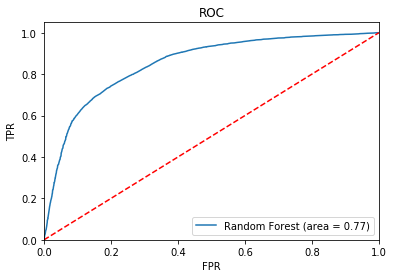

In [128]:
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import roc_curve 
import matplotlib.pyplot as plt

logit_roc_auc = roc_auc_score(y, rfc.predict(X)) 

plt.figure() 
fpr, tpr, thresholds = roc_curve(y, rfc.predict_proba(X)[:,1]) 
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % logit_roc_auc) 
plt.plot([0, 1], [0, 1],'r--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('FPR') 
plt.ylabel('TPR') 
plt.title('ROC') 
plt.legend(loc="lower right") 
plt.savefig('Log_ROC') 
plt.show()

### Model Sex without Age Var

In [77]:
data_Sex_w_Age = df[['sex', 'Length', 'Unique_Value', 'Max_Frequence']].copy()
#data_Sex_w_Age = pd.get_dummies(data_Sex_w_Age, columns=['sex'])

In [80]:
data_Sex_w_Age.head()

,sex,Length,Unique_Value,Max_Frequence
1,M,34,11,4
3,M,181,122,10
8,M,854,428,27
9,M,14,11,2
14,F,13,9,3


In [82]:
X_w_Age = data_Sex_w_Age.loc[:, data_Sex_w_Age.columns !="sex"]
y_w_Age = data_Sex_w_Age.loc[:, data_Sex_w_Age.columns =="sex"]

In [83]:
y_w_Age= pd.get_dummies(y_w_Age, drop_first=True)

In [85]:
X_w_Age.head()

,Length,Unique_Value,Max_Frequence
1,34,11,4
3,181,122,10
8,854,428,27
9,14,11,2
14,13,9,3


In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_w_Age,y_w_Age,test_size = 0.3, random_state = 0)

In [89]:
from sklearn.ensemble import RandomForestClassifier
rfc_w_Age = RandomForestClassifier(random_state=0, n_estimators=100)
rfc_w_Age.fit(X_train, y_train)
pred_rfc_w_Age = rfc_w_Age.predict(X_test)

C:\Users\Arunima\Anaconda\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [90]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_rfc_w_Age))

              precision    recall  f1-score   support

           0       0.52      0.47      0.49      2127
           1       0.57      0.62      0.59      2415

    accuracy                           0.55      4542
   macro avg       0.54      0.54      0.54      4542
weighted avg       0.55      0.55      0.55      4542



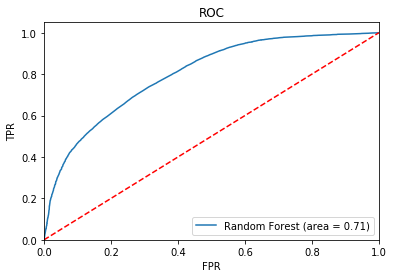

In [91]:
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import roc_curve 
import matplotlib.pyplot as plt

logit_roc_auc = roc_auc_score(y_w_Age, rfc_w_Age.predict(X_w_Age)) 

plt.figure() 
fpr, tpr, thresholds = roc_curve(y_w_Age, rfc_w_Age.predict_proba(X_w_Age)[:,1]) 
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % logit_roc_auc) 
plt.plot([0, 1], [0, 1],'r--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('FPR') 
plt.ylabel('TPR') 
plt.title('ROC') 
plt.legend(loc="lower right") 
plt.savefig('Log_ROC') 
plt.show()

### Modeling Age with Sex

In [92]:
data_Age = df[['age','sex','Unique_Value','Max_Frequence', 'Typology']].copy()

In [93]:
data_Age = pd.get_dummies(data_Age, columns=['sex','Typology'])

In [94]:
X_AGE = data_Age.loc[:, data_Age.columns !="age"]
y_AGE = data_Age.loc[:, data_Age.columns =="age"]

In [95]:
from sklearn.model_selection import train_test_split
X_train_AGE, X_test_AGE, y_train_AGE, y_test_AGE = train_test_split(X_AGE,y_AGE,test_size = 0.3, random_state=23)

In [96]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression ()
regressor.fit(X_train_AGE,y_train_AGE)
y_pred = regressor.predict(X_test_AGE)

In [97]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test_AGE, y_pred)

172.3578412561838

### Modeling Age without Sex Var

In [98]:
data_w_Sex = df[['age','Unique_Value','Max_Frequence']].copy()

In [99]:
X_w_SEX = data_w_Sex.loc[:, data_w_Sex.columns !="age"]
y_w_SEX = data_w_Sex.loc[:, data_w_Sex.columns =="age"]

In [100]:
from sklearn.model_selection import train_test_split
X_train_w_AGE, X_test_w_AGE, y_train_w_AGE, y_test_w_AGE = train_test_split(X_w_SEX,y_w_SEX,test_size = 0.3, random_state=23)

In [101]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression ()
regressor.fit(X_train_w_AGE,y_train_w_AGE)
y_pred_w_SEX = regressor.predict(X_test_w_AGE)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test_w_AGE, y_pred_w_SEX)

### Testing

In [102]:
test_file=pd.read_csv('C:/Users/Arunima/OneDrive/Documents/ESCP/Python/Final/test.csv')

In [103]:
test1 = test_file.sample(frac=0.015, replace=True, random_state=23)

In [104]:
test1.to_excel('test1.xlsx')

In [105]:
df_test = pd.read_excel("C:/Users/Arunima/OneDrive/Documents/GitHub/test1.xlsx")

In [106]:
df_test.dropna(subset=['keywords'], inplace=True)

In [107]:
from nltk.corpus import stopwords
c = stopwords.words('french')

In [108]:
import string
nopunc = [char for char in df_test if char not in string.punctuation]

In [109]:
df_test['words'] = df_test["keywords"].apply(processing)

In [110]:
preparation(df_test)

In [111]:
df_test = df_test.query('Max_Frequence > 1')

In [112]:
wording_preparation(df_test)

In [113]:
Test_Age = df_test[['Unique_Value', 'Max_Frequence']].copy()

In [114]:
Test_Age.dtypes

Unique_Value     int64
Max_Frequence    int64
dtype: object

In [115]:
prediction = regressor.predict(Test_Age)

In [116]:
Test_Age['age'] = prediction
Test_Age['age'].head()

0     45.962882
4     45.938339
7     46.329232
10    46.104176
13    46.161706
Name: age, dtype: float64

In [117]:
Test_Sex = df_test[['Unique_Value','Max_Frequence']].copy()

In [118]:
Test_Sex['age'] = Test_Age['age']

In [131]:
predictions_gender = pd.DataFrame(rfc.predict(Test_Sex))

In [134]:
Test_Sex['sex'] = predictions_gender

In [135]:
Test_Sex.head()

,Unique_Value,Max_Frequence,age,sex
0,4,4,45.962882,0.0
4,4,2,45.938339,0.0
7,32,2,46.329232,1.0
10,15,3,46.104176,0.0
13,20,2,46.161706,1.0


In [137]:
#Replacing 0 or 1 with M or F

sex = []

for i in Test_Sex.sex:
    if i == 0:
        sex.append('F')
    else:
        sex.append('M')
        
Test_Sex['sex'] = sex

In [138]:
#Exporting the output

Results = Test_Sex[['sex','age']]
Results['ID'] = df_test['ID']

C:\Users\Arunima\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [139]:
Results.head()

,sex,age,ID
0,F,45.962882,2990676
4,F,45.938339,1844713
7,M,46.329232,1469901
10,F,46.104176,1723995
13,M,46.161706,1422861


In [140]:
Results.to_csv('Results.csv')